# MNIST Hand Written Digit Recognition (SciKit-Learn and skorch)

Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.



For this tutorial we will be utilizing colab to execute python code and packages in order to classify handwritten digits with a Neural Network. The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. We will be training our neural netowrk from this dataset so that we can make predictions.




Before we begin we want to enable GPU exceleration to increase our processing power.

Naviagte through **Runtime** > **Change Runtime Type** > **Hardware Excerlerator** and select GPU.



In [0]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Download and prepare the MNIST data set

mnist_data is comprised of a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.

The data and target ( x and y) are in Uint8 and is also converted to float32 and int64 so we can process and understand the information.

We convert the data types and scale down the x range of 0-255 to 0-1

In [0]:
mnist_data = fetch_openml('mnist_784', cache=False)

In [4]:
x = mnist_data.data.astype('float32')
y = mnist_data.target.astype('int64')
x = x / 255.0

x.min(), x.max()


(0.0, 1.0)

#Create train and test datasets, normalize the table.
We will be using a training set for the Neural Netowrk to learn from. Then testing its knowledge by splitting a test sample to verify its accuracy.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
assert(x_train.shape[0] + y_test.shape[0] == mnist_data.data.shape[0])

#Confirmation printing of digits with label

This will be used later to visiaulize our test predicitons.


In [0]:
def plot_test(x, y):
    """Test Print first 5 images in dataset provided"""
    for i, (img, y) in enumerate(zip(x[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

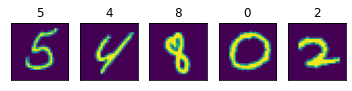

In [66]:
plot_test(x_train, y_train)

#Build the Feed Forward Neural Network

A feed forward neural netowrk has an input layer, hidden layer(s) and an output layer. The information moves forward in one singular direction, input to hidden to output. Each neuron activating based on some evaluation function.


![alt text](https://www.researchgate.net/profile/Montalee_Sasananan/publication/281271367/figure/fig2/AS:284441772609536@1444827611106/Feed-Forward-Neural-Network-with-Back-Propagation.png)

For simplicity we will have only one hidden layer made up of (784/6=130) neurons, the input layer will have 784 neurons (28x28 pixels) and the output has 10 neurons representing digits 0-9.


In [0]:
import torch
from torch import nn
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [0]:
dimensions = x.shape[1]
hidden_size = int(dimensions/6)
output_size = len(np.unique(mnist_data.target))

#Using NeuralNet
We define our module as Net which utilizes torch's nn.Module. This wraps PyTorch Module in a sklearn interface. We apply nn.Linear transformation in order to set our neural netowrks dimensions and add our feed forward function.

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.dropout = nn.Dropout(0.5)
    self.hidden = nn.Linear(dimensions, hidden_size)
    self.output = nn.Linear(hidden_size, output_size)
  
  def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X


Set our epochs,learning rate and training shuffle every epoch. Then instantiate and train our neural network with fit(). (ensure our class Net is passed in NeuralNetClassifer)

In [0]:
from skorch import NeuralNetClassifier

In [0]:
torch.manual_seed(0)

net = NeuralNetClassifier(
    Net,
    max_epochs=25,
    lr=0.1,
    device=device,
    iterator_train__shuffle=True,
)


In [168]:
net.fit(x_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7720       0.8955        0.3765  0.9139
      2        0.4008       0.9166        0.2929  0.9117
      3        0.3347       0.9262        0.2535  0.9049
      4        0.2963       0.9335        0.2256  0.9172
      5        0.2667       0.9401        0.2036  0.9517
      6        0.2475       0.9444        0.1894  0.9038
      7        0.2316       0.9486        0.1727  0.9124
      8        0.2170       0.9521        0.1625  0.9464
      9        0.2079       0.9551        0.1539  0.9091
     10        0.1950       0.9563        0.1473  0.9055
     11        0.1868       0.9593        0.1403  0.8951
     12        0.1790       0.9590        0.1350  0.8944
     13        0.1748       0.9605        0.1298  0.8874
     14        0.1674       0.9632        0.1259  0.9072
     15        0.1640       0.9633        0.1225  0.9078
     16        0.1578       0.9

#Make some predictions
We will use out test data and find what the accuracy is.

In [0]:
from sklearn.metrics import accuracy_score

In [169]:
y_pred = net.predict(x_test)
accuracy_score(y_test, y_pred)

0.9694285714285714

With 96 percent accurracy, we should be able to predict some of our own data. I drew some digits 28x28 pixel images then greyscalled them into a csv file so they could be easily read.


![alt text](https://github.com/KeenanBrab/MNISTNeuralNetwork/blob/master/testdigits.png?raw=true)


In [0]:
def plot(x,y):
  
  for i,row in enumerate(x):
        plt.figure(figsize=(2.5,1.25))
        pixels = row.reshape((28, 28))
        plt.title(y[i])
        plt.imshow(pixels)
        plt.show()
             
  

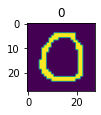

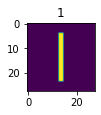

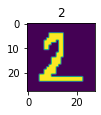

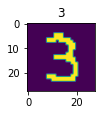

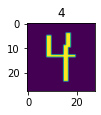

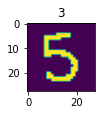

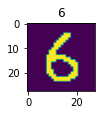

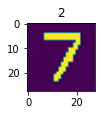

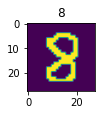

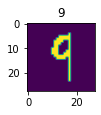

In [171]:
import pandas as pd

url = 'https://raw.githubusercontent.com/KeenanBrab/MNISTNeuralNetwork/master/testData.csv'
url2 = "https://raw.githubusercontent.com/KeenanBrab/MNISTNeuralNetwork/master/dataLabel.csv"

df = pd.read_csv(url)
labels = pd.read_csv(url2)
mytest = df.to_numpy()
myresults = labels.to_numpy()


y_pred = net.predict(mytest.astype('float32'))
accuracy_score(myresults.astype('int64'), y_pred)
plot(mytest,y_pred)





#Results

After running the code above you can see it classified majority of the digits correctly. The inccorectly classified digit is 7 which it mistakes for a 2. 